<a href="https://colab.research.google.com/github/yishairasowsky/professional_qualifications/blob/master/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import h5py
import shutil
import scipy
import random
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from scipy import ndimage
from skimage.transform import resize

%matplotlib inline

In [ ]:
folder_path = '/content/drive/MyDrive/Colab Datasets/cats_and_dogs_filtered'
# shutil.rmtree(folder_path)
file_path = '/content/drive/MyDrive/Colab Datasets/cats_and_dogs_filtered.zip'
# os.remove(file_path)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O "/content/drive/MyDrive/Colab Datasets/cats_and_dogs_filtered.zip"

In [ ]:
local_zip = '/content/drive/MyDrive/Colab Datasets/cats_and_dogs_filtered.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content/drive/MyDrive/Colab Datasets')
# zip_ref.close()

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Datasets/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
dirs = {}
for animal_type in ['cats','dogs']:
  dirs[f'train_{animal_type}'] = os.path.join(train_dir, animal_type)
  dirs[f'validation_{animal_type}'] = os.path.join(validation_dir, animal_type)

In [ ]:
names = {}
for animal_type in ['cats','dogs']:
  names[f'train_{animal_type}'] = os.listdir(dirs[f'train_{animal_type}'])
  names[f'validation_{animal_type}'] = os.listdir(dirs[f'validation_{animal_type}'])

In [ ]:
paths = {}
for animal_type in ['cats','dogs']:
  paths[f'train_{animal_type}'] = [os.path.join(dirs[f'train_{animal_type}'], fname) for fname in names[f'train_{animal_type}']]
  paths[f'test_{animal_type}'] = [os.path.join(dirs[f'validation_{animal_type}'], fname) for fname in names[f'validation_{animal_type}']]

In [ ]:
train_paths = paths['train_dogs'] + paths['train_cats']
test_paths = paths['test_dogs'] + paths['test_cats']

In [ ]:
random.Random(4).shuffle(train_paths)
random.Random(4).shuffle(test_paths)

In [ ]:
train_size = 20
test_size = 10

In [ ]:
cat_str = 'cats/cat.'
train_y = np.array([float(cat_str in path) for path in train_paths[:train_size]]).reshape(1,train_size)
test_y = np.array([float(cat_str in path) for path in test_paths[:test_size]]).reshape(1,test_size)

In [ ]:
print(train_y.shape)
print(test_y.shape)

(1, 20)
(1, 10)


In [ ]:
for i in [2,4,7]:
  print(train_y[0,i],train_paths[i][train_paths[i].rfind('/')+1:train_paths[i].rfind('.')])
  print(test_y[0,i],test_paths[i][test_paths[i].rfind('/')+1:test_paths[i].rfind('.')])

1.0 cat.835
1.0 cat.2170
0.0 dog.859
1.0 cat.2243
0.0 dog.104
0.0 dog.2259


In [ ]:
train_imgs = [mpimg.imread(img_path) for img_path in train_paths[:train_size]]
test_imgs = [mpimg.imread(img_path) for img_path in test_paths[:test_size]]

In [ ]:
num_px = 64
height = num_px
width = num_px
train_x_orig = np.array([resize(img,(height,width)) for img in train_imgs])
test_x_orig = np.array([resize(img,(height,width)) for img in test_imgs])

In [ ]:
print(train_x_orig.shape)
print(test_x_orig.shape)
print("shape = (num_imgs,height,width,colors)")

(20, 64, 64, 3)
(10, 64, 64, 3)
shape = (num_imgs,height,width,colors)


In [ ]:
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T

print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x shape: " + str(test_x.shape))
print ("test_y shape: " + str(test_y.shape))

train_x shape: (12288, 20)
train_y shape: (1, 20)
test_x shape: (12288, 10)
test_y shape: (1, 10)


In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def relu(z):
  return np.maximum(0,z)

In [ ]:
# z = np.arange(-4, 4, 0.2)
# plt.figure(figsize=(6, 3))
# plt.plot(z,relu(z), 'r--', label='ReLU')
# plt.plot(z,sigmoid(z), 'b--', label='Sigmoid')
# # plt.legend()
# # axes = plt.gca()
# # axes.set_ylim([-0.1,1.0])
# # plt.show()

In [ ]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1)) # column vector
    b = 0
    return w, b

# initialize_with_zeros(4)

In [ ]:
def get_cost(m,Y,A):
  y_near_1 = Y * np.log(A) # low loss if A near 1
  y_near_0 = (1 - Y) * (np.log(1 - A)) # low loss if A near 0
  total_loss = np.sum(y_near_1 + y_near_1) # compute cost
  avg_loss = (- 1 / m) * total_loss
  return avg_loss

def get_num_samples(X):
  return  X.shape[1] 

def get_dJ_dw(m,X,Y,A):
  return (1 / m) * np.dot(X, (A - Y).T) 

def get_dJ_db(m,Y,A):
  return (1 / m) * np.sum(A - Y)

def get_grads(m,X,Y,A):
  dw = get_dJ_dw(m,X,Y,A)
  db = get_dJ_db(m,Y,A)
  return {"dw": dw,
          "db": db}

def propagate(w, b, X, Y):
  m = get_num_samples(X)
  Z = np.dot(w.T, X) + b
  # activation
  # A = relu(Z)  
  A = sigmoid(Z) 
  J = get_cost(m,Y,A) # avg loss
  grads = get_grads(m,X,Y,A)
  return grads, J

In [ ]:
def update_params(w,b,dw,db,learning_rate):
  w = w - learning_rate * dw  # need to broadcast
  b = b - learning_rate * db
  return w,b

def display_cost(num_iterations,i,costs,cost,print_cost):
  if i % int(num_iterations/10.0) == 0:
    costs.append(cost)  
    if print_cost:
      print ("Cost after iteration %i: %f" % (i, cost))
  return costs


def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y) # forward propogation
        w,b = update_params(w,b,grads["dw"],grads["db"],learning_rate) # back propogation
        costs = display_cost(num_iterations,i,costs,cost,print_cost)
    params = {"w": w,
              "b": b}
    return params, grads, costs

In [ ]:
def apply_prediction_threshold(A):
  m = get_num_samples(A)
  Y_prediction = np.zeros((1, m)) # init row vector
  for i in range(m):
    Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
  return Y_prediction

def predict(w, b, X):
  m = get_num_samples(X)
  w = w.reshape(X.shape[0], 1) # column vector, one row per input feature
  A = sigmoid(np.dot(w.T, X) + b)
  Y_prediction = apply_prediction_threshold(A)
  assert(Y_prediction.shape == (1, m)) # predictions must be a row vector
  return Y_prediction

In [ ]:
def get_num_features(X):
  return X.shape[0]

def display_accuracy(dataset,pred,true):
  vectorized_errors = np.abs(pred - true)
  mean_error = np.mean(vectorized_errors)
  print(f"{dataset} accuracy: {100*(1 - mean_error)}")

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.05, print_cost=False):
  n_x = get_num_features(X_train)
  w, b = initialize_with_zeros(n_x) # one weight per input feature
  parameters, grads, costs = optimize(w, b, X_train, Y_train, 
                                      num_iterations, learning_rate, print_cost)
  w = parameters["w"]
  b = parameters["b"]

  Y_prediction_test = predict(w, b, X_test)
  Y_prediction_train = predict(w, b, X_train)

  display_accuracy('Train',Y_prediction_train,Y_train)
  display_accuracy('Test',Y_prediction_test,Y_test)
  
  d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test, 
        "Y_prediction_train" : Y_prediction_train, 
        "w" : w, 
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations}
  
  return d

In [ ]:
d = model(train_x, train_y, test_x, test_y, 
          num_iterations = 2000, 
          learning_rate = 0.01, 
          print_cost = True)

Cost after iteration 0: 0.485203
Cost after iteration 200: 0.019715
Cost after iteration 400: 0.010417
Cost after iteration 600: 0.007072
Cost after iteration 800: 0.005350
Cost after iteration 1000: 0.004302
Cost after iteration 1200: 0.003597
Cost after iteration 1400: 0.003090
Cost after iteration 1600: 0.002708
Cost after iteration 1800: 0.002410
Train accuracy: 100.0
Test accuracy: 60.0


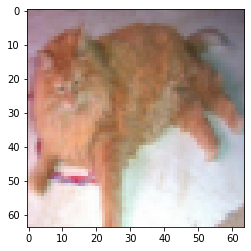

In [ ]:
index = 3
plt.imshow(test_x[:,index].reshape((num_px, num_px, 3)))
plt.show()

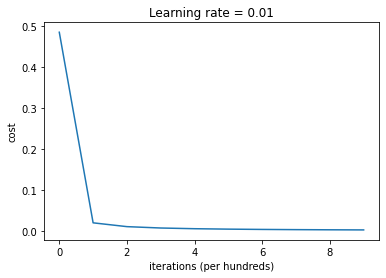

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
Train accuracy: 100.0
Test accuracy: 60.0

-------------------------------------------------------

learning rate is: 0.001
Train accuracy: 100.0
Test accuracy: 60.0

-------------------------------------------------------

learning rate is: 0.0005
Train accuracy: 100.0
Test accuracy: 60.0

-------------------------------------------------------



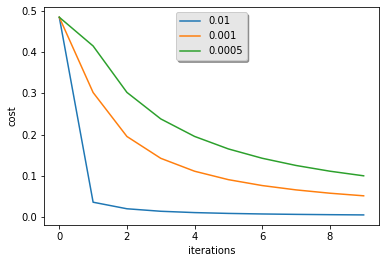

In [ ]:
learning_rates = [
                  0.01, 
                  0.001,
                  0.0005, 
                  ]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_x, train_y, test_x, test_y, num_iterations = 1000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()


In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters 

def linear_activation_forward(A_prev, W, b, activation):
  if activation == "sigmoid":
      # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
      ### START CODE HERE ### (≈ 2 lines of code)
      Z, linear_cache = linear_forward(A_prev, W, b)
      A, activation_cache = sigmoid(Z)
      ### END CODE HERE ###

  elif activation == "relu":
      # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
      ### START CODE HERE ### (≈ 2 lines of code)
      Z, linear_cache = linear_forward(A_prev, W, b)
      print(Z)
      print(linear_cache)
      # A, activation_cache = relu(Z)
      # print(relu(Z))
      ### END CODE HERE ###

  # assert (A.shape == (W.shape[0], A_prev.shape[1]))
  # cache = (linear_cache, activation_cache)

  # return A, cache
  return None

def compute_cost(AL, Y):
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        ### END CODE HERE ###
    
    # Shorten the code
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db
    
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    ### END CODE HERE ###
        
    return parameters


In [ ]:
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)


In [ ]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters


In [ ]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):

SyntaxError: ignored

In [ ]:

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W, A) + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache


In [ ]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)


Hello
[[ 0.72505969  0.59795303  0.82248198  0.60649023  0.92487774  0.52370065
   0.02517019  0.60900702  0.93791633  0.35097182  0.531964    0.73467893
   0.81609571  0.4123834   0.7560495   0.91704312  0.57471641  1.17998683
   0.47416562  0.7093775 ]
 [ 0.1116713   0.09031542  0.10060919 -0.04594141 -0.04798621  0.00368176
  -0.09150566 -0.00624903  0.00941404 -0.14745496 -0.24741482  0.09727295
  -0.0181755   0.01618823  0.1167668   0.06837375 -0.39751405 -0.15044806
   0.1674568   0.2803949 ]
 [-0.07271781  0.86492014  0.56278863  0.26443952  0.31775313  0.02061734
   0.67071242  0.23793699  0.58167715  0.42327752  0.27580362  0.22281539
   0.51462004  0.04281959 -0.34149437  0.44204135  0.47878577  0.66234048
   0.37681494 -0.00341361]
 [-0.5490672  -0.01643868 -0.34569413 -0.57554172 -0.05026549 -0.24062878
  -0.24750451 -0.59194021 -0.93194527  0.03424803 -0.12186063 -0.39804145
  -0.15764774  0.10085395 -0.49155764 -0.17329079 -0.18345882 -0.51897568
  -0.06691419 -0.41685415

TypeError: ignored